## <p style="background-color:magenta; font-family:newtimeroman; font-size:180%; text-align:center; border-radius: 15px 50px;">Correlation</p>

----------------

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [2]:
train = pd.read_csv("F:/3.Suresh/1.Material/05.Data Science/22_Data Sets/kaggle/Tabular_Playground_Mar/train.csv.zip")
test = pd.read_csv("F:/3.Suresh/1.Material/05.Data Science/22_Data Sets/kaggle/Tabular_Playground_Mar/test.csv.zip")

In [3]:
display(train.head(2))
display(test.head(2))

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0


,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580


## Numerical Features

In [4]:
features_num = ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10']

## <p style="background-color:GreenYellow; font-family:newtimeroman; font-size:120%; text-align:left; ">i) The correlation between the continuos variables</p> 

- a. Pearson Correlation
- b. Spearman Correlation
- c. Kendral Correlation

In [5]:
corr_pearson = train[features_num].corr(method='pearson')
corr_spearman = train[features_num].corr(method='spearman')

## a. Pearson Correlation

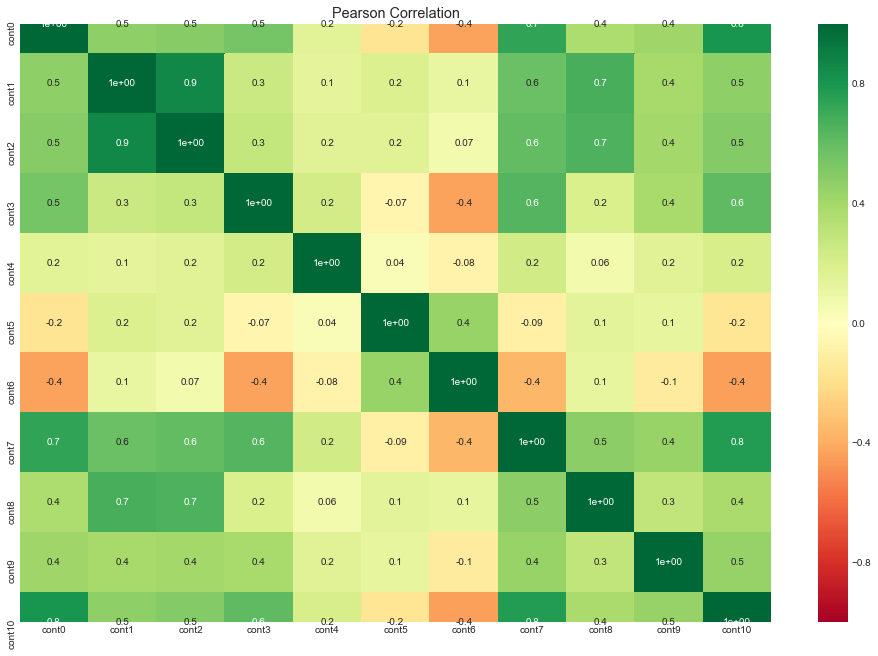

In [6]:
fig = plt.figure(figsize = (15,11))
sns.heatmap(corr_pearson, annot=True, fmt='.1', cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

## b. Spearman Correlation

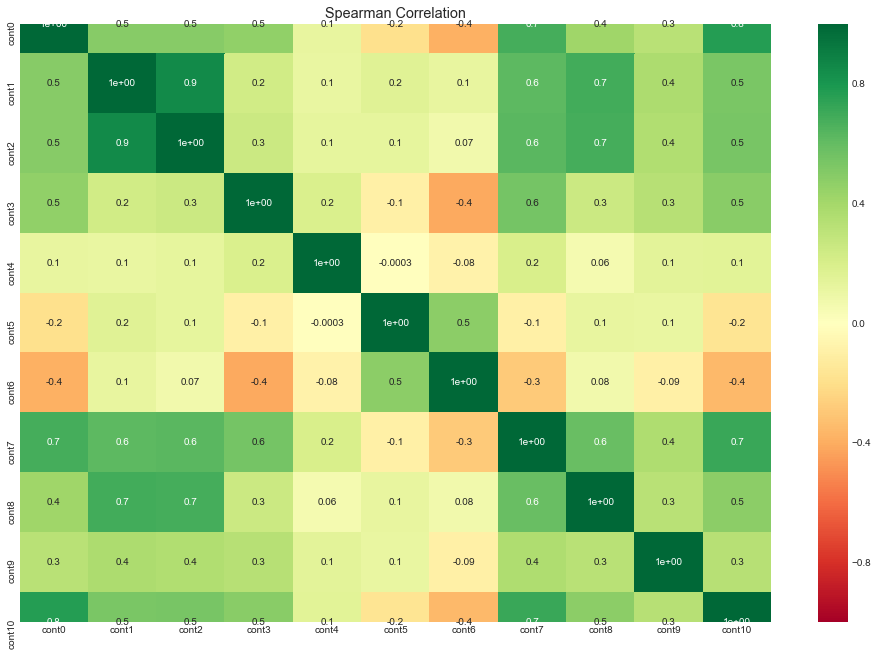

In [7]:
fig = plt.figure(figsize = (15,11))
sns.heatmap(corr_spearman, annot=True, fmt='.1', cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

## c. Kendral Correlation

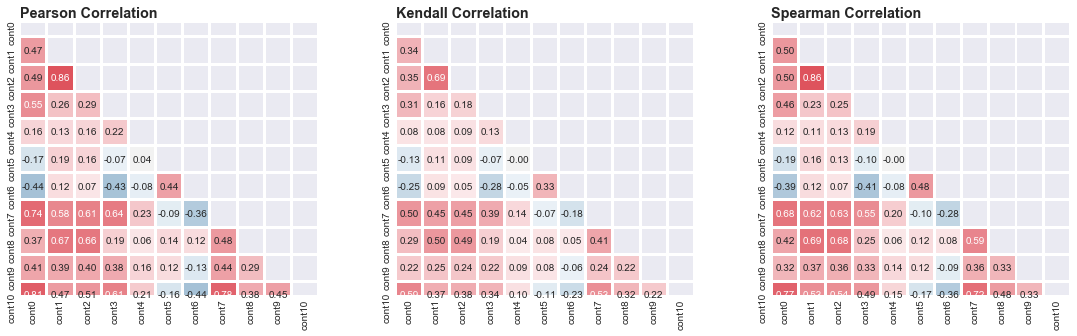

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(17 , 5))

# feature_lst = ['Pclass', 'Age', 'SibSp','Parch','Fare', 'Family']

corr = train[features_num].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(train[features_num].corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.2f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           ) 
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     

plt.show()

## <p style="background-color:GreenYellow; font-family:newtimeroman; font-size:120%; text-align:left; ">ii) The correlation between this continuos features and the target</p> 

In [10]:
train.corr()['target'].sort_values(ascending=False)

target    1.000000
cont5     0.215184
cont6     0.189832
cont8     0.183726
cont1     0.164655
cont2     0.140459
cont9     0.059242
id       -0.001407
cont0    -0.015172
cont7    -0.040646
cont10   -0.047077
cont4    -0.075585
cont3    -0.148316
Name: target, dtype: float64

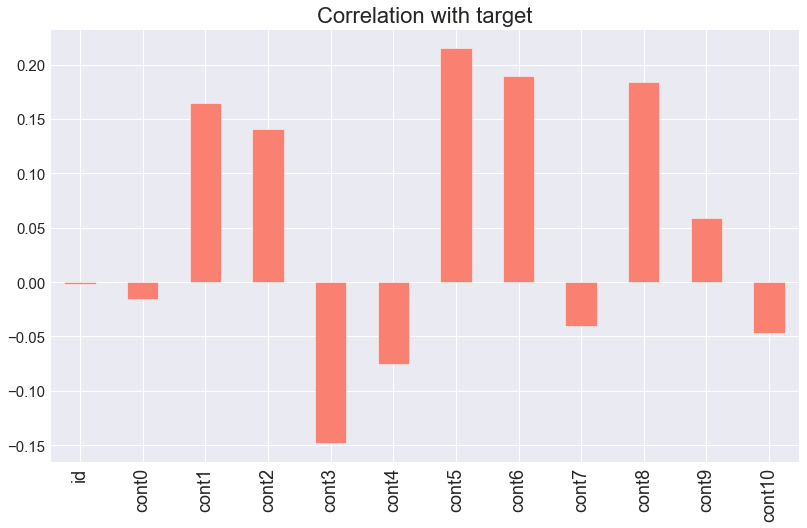

In [11]:
a = train.drop('target', axis=1)
a.corrwith(train.target).plot(kind='bar', grid=True, figsize=(12, 8), color=['salmon'])

plt.title("Correlation with target", size=22)
plt.xticks(size=18)
plt.yticks(size=15)
plt.show()

----------------